# Music Genre Classification with Custom Extracted Features

This notebook uses the custom features extracted from the music files downloaded and uses SVM to try and classify them. The process followed will be the exact same as the earlier SVM attempt with Spotify features

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

Importing the Dataset

In [7]:
music = pd.read_csv('musicdata.csv', encoding = "ISO-8859-1")

Looking at the Genres

In [8]:
music['genre'].value_counts()

Classical    472
Rock         377
Blues        368
Pop          271
Hip-Hop      205
Qawwali      198
Rap          186
EDM          140
Ghazal       134
Metal        113
Name: genre, dtype: int64

Testing out an SVM Model Without Hyperparameter Tuning

In [9]:
##Extracting all spotify features as a matrix
X = music.iloc[:, 3:26].values

## Extracting Genres
y = music['genre']

# split into training data (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, shuffle = True, random_state=0)

# Standardize
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

#create parameter grid for tuning
svm = SVC(kernel = 'rbf', C=1, random_state = 0)
svm.fit(X_train_standardized,y_train)
y_predicted = svm.predict(X_test_standardized)
## 
print("Accuracy :\n", accuracy_score(y_true=y_test, y_pred=y_predicted))


Accuracy :
 0.5517241379310345


Tuning of hyperparameters and model selection

In [10]:
param_grid = { 'C':[0.1,1,100],'kernel': ['rbf','sigmoid','linear','poly'], 'degree': [1,2,3], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs= -1)

# train SVM
grid_model_result = grid.fit(X_train_standardized, y_train)

#extracting best parameters
best_params = grid.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Getting the accuracy

In [13]:
y_predicted = grid_model_result.best_estimator_.predict(X_test_standardized)
print("Accuracy :\n", accuracy_score(y_true=y_test, y_pred=y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy :
 0.592292089249493
              precision    recall  f1-score   support

       Blues       0.51      0.65      0.57        74
   Classical       0.94      0.96      0.95        94
         EDM       0.46      0.39      0.42        28
      Ghazal       0.62      0.48      0.54        27
     Hip-Hop       0.34      0.27      0.30        41
       Metal       0.48      0.52      0.50        23
         Pop       0.42      0.37      0.39        54
     Qawwali       0.49      0.45      0.47        40
         Rap       0.43      0.41      0.42        37
        Rock       0.68      0.72      0.70        75

    accuracy                           0.59       493
   macro avg       0.54      0.52      0.53       493
weighted avg       0.59      0.59      0.59       493



In [ ]:
cross_val_score(grid.model_result.best_estimator, X_test_standardized, y_test, n_jobs = 10)

Checking Which Results Are Wrong

In [8]:
results = pd.DataFrame(X_test.copy())
results.loc[:, 'genre'] = list(y_test)
results.loc[:, 'preds'] = y_predicted.copy()
results_wrong = results[results['genre'] != results['preds']]
results_wrong['genre'].value_counts(normalize=True)

Pop          0.169154
Hip-Hop      0.149254
Blues        0.129353
Qawwali      0.109453
Rap          0.109453
Rock         0.104478
EDM          0.084577
Ghazal       0.069652
Metal        0.054726
Classical    0.019900
Name: genre, dtype: float64

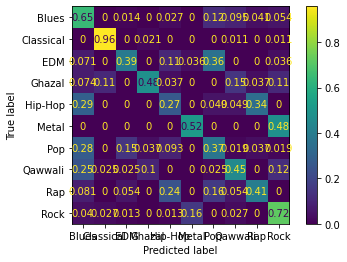

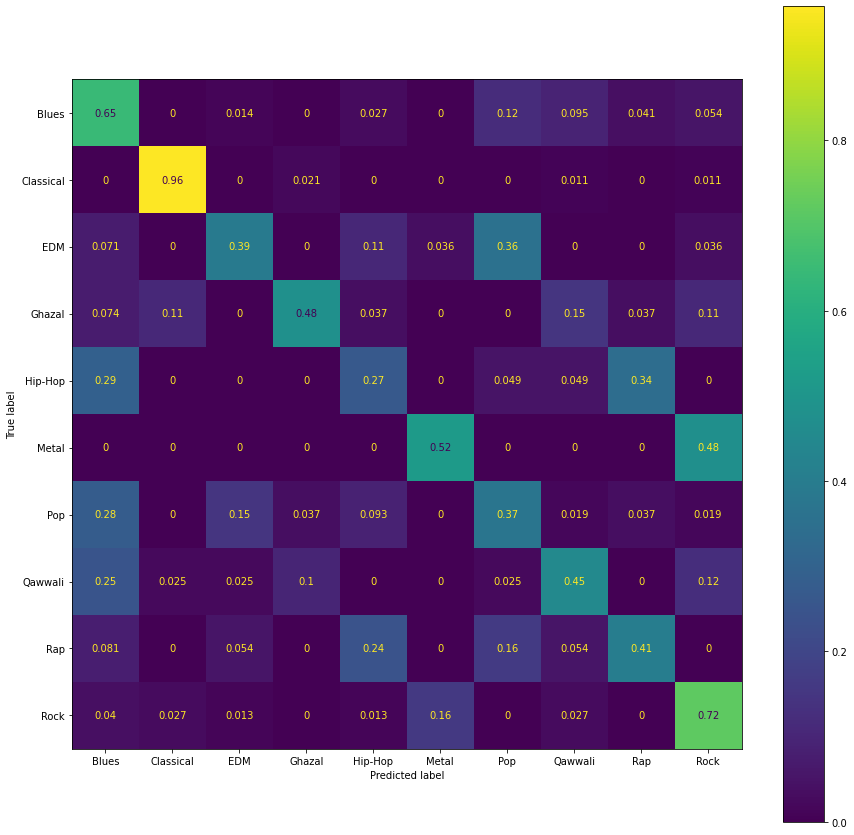

In [16]:
cmp = ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, normalize = "true")
fig, ax = plt.subplots(figsize=(15, 15))
ax.grid(False)
cmp.plot(ax = ax)

The overall accuracy of the model has definitely increased. However, rock was classified much better with the spotify features. At the same time, Qawwali, which was being predicted at a rate of only 0.053 using spotify features can now be predicted with an accuracy of about 45%. This is massive improvement and shows that our initial inclinations were correct